# Probability & Information Theory (by Jon Krohn on O'Reilly)

#### Factorial and Combinatics

In [1]:
from math import factorial

In [2]:
def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [3]:
[coinflip_prob(5,h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### The Law of Large Numbers
"the more experiments we run, the closer we will tend to get to the expected probability."

In [4]:
import numpy as np

# a vector of exponentially increasing numbers of coin tosses per experiment
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])

In [5]:
np.random.seed(42)  # for reproducibility

In [6]:
np.random.binomial(1, 0.5)  
# binomial(number of coin flips, probability of heads) = number of flips that are heads in the experiment

0

In [7]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [8]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

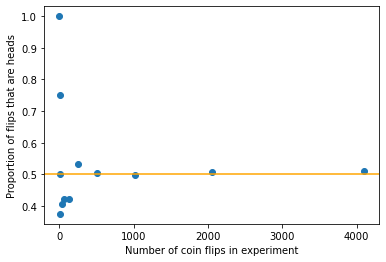

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

#### Statistics
The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence.\
For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin.

In [10]:
n_exp = 1000
heads_count = np.random.binomial(5, 0.5, n_exp)

In [11]:
heads, event_count = np.unique(heads_count, return_counts=True)
heads

array([0, 1, 2, 3, 4, 5])

In [12]:
event_count

array([ 33, 181, 285, 313, 160,  28], dtype=int64)

In [13]:
event_proba = event_count/n_exp
event_proba

array([0.033, 0.181, 0.285, 0.313, 0.16 , 0.028])

Text(0, 0.5, 'Event probability')

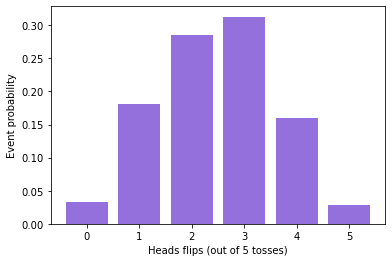

In [14]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability')

#### Expected Value

In [16]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

From the slides:
\begin{align}
\tag{2.3}
\mathbb{E}=\displaystyle\sum_{\substack{x}}xP(x)
\end{align}

In [18]:
E = sum([P[x]*x for x in range(6)])
E

2.5

Exercise 1. Assuming heads=1 and tails=0, what's the expected value of the toss of a fair coin?  
Exercise 2. ...and of two tosses of a fair coin?  
Exercise 3. You are one of a thousand people to purchase a lottery ticket. The ticket costs \$10 and pays out \$5000. What value should you expect from this transaction?

\begin{align}
\tag{2.3.1}
\frac{1}{2} \times 0 + \frac{1}{2} \times 1 = 0.5
\end{align}

\begin{align}
\tag{2.3.2}
\frac{1}{4} \times 0 + \frac{1}{2} \times 1 + \frac{1}{4} \times 2 = 1.0
\end{align}

\begin{align}
\tag{2.3.3}
\frac{1}{1000} \times (5000 - 10) + \frac{999}{1000} \times (- 10) 
= 4.99 - 9.99
= -5
\end{align}

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the <strong>mean</strong>, often symbolized with $\mu$ (popilation) or $\bar{x}$ (sample):  
\begin{align}
\tag{3.1.1}
\bar{x} = \frac{\sum_{i=1}^n x_i}{n}
\end{align}

Expected value is in fact the long-term ***mean*** of some function (i.e., $\mu=\mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to te expected value, $\mathbb{E}=2.5$.

In [23]:
len(heads_count)

1000

In [24]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [25]:
# manual calculation of mean
sum(heads_count)/len(heads_count)

2.47

Unsurprisingly, NumPy comes with a built-in function:

In [26]:
np.mean(heads_count)

2.47

#### Medians

In [28]:
heads_count.sort()
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

With an odd number of values in distribution, we consider the single midpoint to be the median;  
With an even number, we take the mean of the two values that straddle the midpoint:

In [30]:
heads_count[499]

3

In [31]:
heads_count[500]

3

In [32]:
(3 + 3) /2

3.0

Built-in method:

In [33]:
np.median(heads_count)

3.0

#### Mode

The <strong>mode</strong> is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.  
As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three.  
Method available in the SciPy <code>stats</code> module:

In [35]:
import scipy.stats as st
st.mode(heads_count)

ModeResult(mode=array([3]), count=array([313]))

In [36]:
st.mode(heads_count)[0][0]

3

With small sample sizes, the mean typicaly provides the most accurate measure of central tendency.  
With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed:

In [37]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew (i.e. normally distributed)

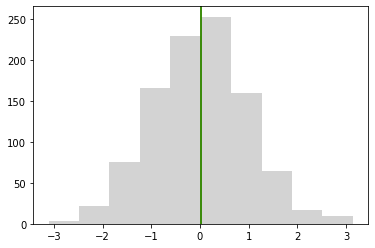

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')
# Note: Mode typically only applies to PMFs; this is a PDF

In [41]:
x = st.skewnorm.rvs(10, size=1000) 

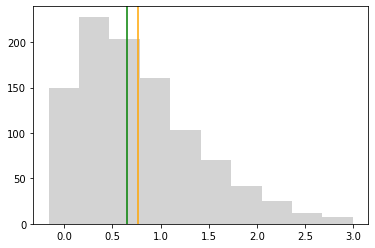

In [42]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

The mode is <strong>least</strong> impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency.